<a href="https://colab.research.google.com/github/OguzBerkAydin/RentPrediction/blob/main/rentPrediction%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/evkiratahmin/housing.csv")

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households"]
for column in columns:
    data = remove_outliers(data, column)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17941 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17941 non-null  float64
 1   latitude            17941 non-null  float64
 2   housing_median_age  17941 non-null  float64
 3   total_rooms         17941 non-null  float64
 4   total_bedrooms      17941 non-null  float64
 5   population          17941 non-null  float64
 6   households          17941 non-null  float64
 7   median_income       17941 non-null  float64
 8   median_house_value  17941 non-null  float64
 9   ocean_proximity     17941 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [ ]:
data = pd.get_dummies(data, columns=["ocean_proximity"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17941 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   17941 non-null  float64
 1   latitude                    17941 non-null  float64
 2   housing_median_age          17941 non-null  float64
 3   total_rooms                 17941 non-null  float64
 4   total_bedrooms              17941 non-null  float64
 5   population                  17941 non-null  float64
 6   households                  17941 non-null  float64
 7   median_income               17941 non-null  float64
 8   median_house_value          17941 non-null  float64
 9   ocean_proximity_<1H OCEAN   17941 non-null  uint8  
 10  ocean_proximity_INLAND      17941 non-null  uint8  
 11  ocean_proximity_ISLAND      17941 non-null  uint8  
 12  ocean_proximity_NEAR BAY    17941 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  179

In [ ]:
data.ocean_proximity_ISLAND.value_counts()

0    17936
1        5
Name: ocean_proximity_ISLAND, dtype: int64

In [ ]:
X = data.drop("median_house_value", axis = 1)
y = data["median_house_value"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
dt_reg_score = dt_model.score(X_test,y_test)

In [ ]:
dt_reg_score

0.637330901388066

In [ ]:
from sklearn.metrics import mean_absolute_error
dt_mae = mean_absolute_error(y_test,y_pred)

In [ ]:
dt_mae

44912.56659855099

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

data = pd.read_csv("/content/drive/MyDrive/evkiratahmin/housing.csv")

data.dropna(inplace=True)


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households"]
for column in columns:
    data = remove_outliers(data, column)


data = pd.get_dummies(data, columns=["ocean_proximity"])

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



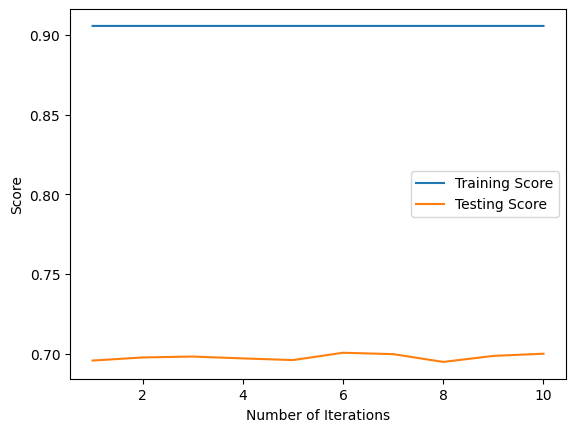

Mean Absolute Error: 41427.738159352266


0.7000423077845499

In [ ]:
train_scores = []
test_scores = []

for i in range(1, 11):
    dt_model = DecisionTreeRegressor(max_depth=15, min_samples_split=15)
    dt_model.fit(X_train, y_train)
    train_scores.append(dt_model.score(X_train, y_train))
    test_scores.append(dt_model.score(X_test, y_test))


plt.plot(range(1, 11), train_scores, label='Training Score')
plt.plot(range(1, 11), test_scores, label='Testing Score')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.legend()
plt.show()

y_pred = dt_model.predict(X_test)
dt_reg_score = dt_model.score(X_test,y_test)

dt_mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", dt_mae)
dt_reg_score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor


kf = KFold(n_splits=5, shuffle=True, random_state=42)


dt_model = DecisionTreeRegressor(max_depth=15, min_samples_split=15)


r2_scores = cross_val_score(dt_model, X, y, cv=kf, scoring='r2')


mae_scores = cross_val_score(dt_model, X, y, cv=kf, scoring='neg_mean_absolute_error')


print("Cross-Validation R^2 Scores:", r2_scores)
print("Mean R^2 Score:", np.mean(r2_scores))

print("Cross-Validation MAE Scores:", -mae_scores)
print("Mean MAE Score:", np.mean(-mae_scores))


Cross-Validation R^2 Scores: [0.71052226 0.71793811 0.70352208 0.71243854 0.74525997]
Mean R^2 Score: 0.7179361921952345
Cross-Validation MAE Scores: [41877.46133051 38867.17239331 40080.63548575 39018.346982
 38154.91364397]
Mean MAE Score: 39599.7059671061


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# DecisionTreeRegressor modelini oluşturma
dt_model = DecisionTreeRegressor(max_depth=15, min_samples_split=15)

# Cross-validation skorlarını almak için bir fonksiyon tanımlama
def get_cross_val_scores(model, X, y, cv, scoring):
    train_scores = []
    test_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    return train_scores, test_scores

# Cross-validation skorlarını al
train_scores, test_scores = get_cross_val_scores(dt_model, X, y, kf, 'r2')

# Her bir katman üzerindeki eğitim ve test skorlarını yazdırma
for i, (train_score, test_score) in enumerate(zip(train_scores, test_scores), 1):
    print(f"Fold {i}: Eğitim Skoru = {train_score:.4f}, Test Skoru = {test_score:.4f}")

# Ortalama skorları yazdırma
print("Ortalama Eğitim Skoru:", np.mean(train_scores))
print("Ortalama Test Skoru:", np.mean(test_scores))


# Cross-validation skorlarını almak için bir fonksiyon tanımlama (MAE için)
def get_cross_val_mae_scores(model, X, y, cv):
    train_maes = []
    test_maes = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        train_mae = -np.mean(cross_val_score(model, X_train, y_train,  scoring='neg_mean_absolute_error'))
        test_mae = -np.mean(cross_val_score(model, X_test, y_test,  scoring='neg_mean_absolute_error'))

        train_maes.append(train_mae)
        test_maes.append(test_mae)

    return train_maes, test_maes

# Cross-validation MAE skorlarını al
train_maes, test_maes = get_cross_val_mae_scores(dt_model, X, y, kf)

# Her bir katman üzerindeki eğitim ve test MAE skorlarını yazdırma
for i, (train_mae, test_mae) in enumerate(zip(train_maes, test_maes), 1):
    print(f"Fold {i}: MAE Eğitim Skoru = {train_mae:.4f}, MAE Test Skoru = {test_mae:.4f}")

# Ortalama MAE skorları yazdırma
print("Ortalama MAE Eğitim Skoru:", np.mean(train_maes))
print("Ortalama MAE Test Skoru:", np.mean(test_maes))


Fold 1: Eğitim Skoru = 0.9051, Test Skoru = 0.7108
Fold 2: Eğitim Skoru = 0.9110, Test Skoru = 0.7157
Fold 3: Eğitim Skoru = 0.9052, Test Skoru = 0.7081
Fold 4: Eğitim Skoru = 0.9045, Test Skoru = 0.7092
Fold 5: Eğitim Skoru = 0.9001, Test Skoru = 0.7444
Ortalama Eğitim Skoru: 0.9051723914355596
Ortalama Test Skoru: 0.7176234725914812
Fold 1: MAE Eğitim Skoru = 65975.4441, MAE Test Skoru = 66837.3515
Fold 2: MAE Eğitim Skoru = 66354.1539, MAE Test Skoru = 73897.1037
Fold 3: MAE Eğitim Skoru = 65242.0469, MAE Test Skoru = 69606.9214
Fold 4: MAE Eğitim Skoru = 67379.0163, MAE Test Skoru = 65926.6825
Fold 5: MAE Eğitim Skoru = 67304.0374, MAE Test Skoru = 61374.0834
Ortalama MAE Eğitim Skoru: 66450.93972145104
Ortalama MAE Test Skoru: 67528.42849510306


In [ ]:
# K-fold cross-validation için KFold nesnesini oluşturma
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# DecisionTreeRegressor modelini oluşturma
dt_model = DecisionTreeRegressor(max_depth=15, min_samples_split=15)

# Cross-validation skorlarını almak için bir fonksiyon tanımlama
def get_cross_val_scores(model, X, y, cv):
    train_scores = []
    test_scores = []
    train_maes = []
    test_maes = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

        train_mae = mean_absolute_error(y_train, model.predict(X_train))
        test_mae = mean_absolute_error(y_test, model.predict(X_test))

        train_scores.append(train_score)
        test_scores.append(test_score)
        train_maes.append(train_mae)
        test_maes.append(test_mae)

    return train_scores, test_scores, train_maes, test_maes

# Cross-validation skorlarını al
train_scores, test_scores, train_maes, test_maes = get_cross_val_scores(dt_model, X, y, kf)

# Her bir katman üzerindeki eğitim, test, MAE skorlarını yazdırma
for i, (train_score, test_score, train_mae, test_mae) in enumerate(zip(train_scores, test_scores, train_maes, test_maes), 1):
    print(f"Fold {i}: R^2 Eğitim Skoru = {train_score:.4f}, R^2 Test Skoru = {test_score:.4f}, MAE Eğitim Skoru = {train_mae:.4f}, MAE Test Skoru = {test_mae:.4f}")

# Ortalama R^2 ve MAE skorları yazdırma
print("Ortalama R^2 Eğitim Skoru:", np.mean(train_scores))
print("Ortalama R^2 Test Skoru:", np.mean(test_scores))
print("Ortalama MAE Eğitim Skoru:", np.mean(train_maes))
print("Ortalama MAE Test Skoru:", np.mean(test_maes))

Fold 1: R^2 Eğitim Skoru = 0.9053, R^2 Test Skoru = 0.7058, MAE Eğitim Skoru = 22895.1582, MAE Test Skoru = 41792.7672
Fold 2: R^2 Eğitim Skoru = 0.9110, R^2 Test Skoru = 0.7134, MAE Eğitim Skoru = 22655.3961, MAE Test Skoru = 39022.8117
Fold 3: R^2 Eğitim Skoru = 0.9052, R^2 Test Skoru = 0.7108, MAE Eğitim Skoru = 23422.8892, MAE Test Skoru = 39998.3865
Fold 4: R^2 Eğitim Skoru = 0.9045, R^2 Test Skoru = 0.7128, MAE Eğitim Skoru = 23527.2013, MAE Test Skoru = 39054.5359
Fold 5: R^2 Eğitim Skoru = 0.9001, R^2 Test Skoru = 0.7464, MAE Eğitim Skoru = 23812.4318, MAE Test Skoru = 38064.4596
Ortalama R^2 Eğitim Skoru: 0.9052063618120212
Ortalama R^2 Test Skoru: 0.7178364439439054
Ortalama MAE Eğitim Skoru: 23262.61532529257
Ortalama MAE Test Skoru: 39586.59214704606


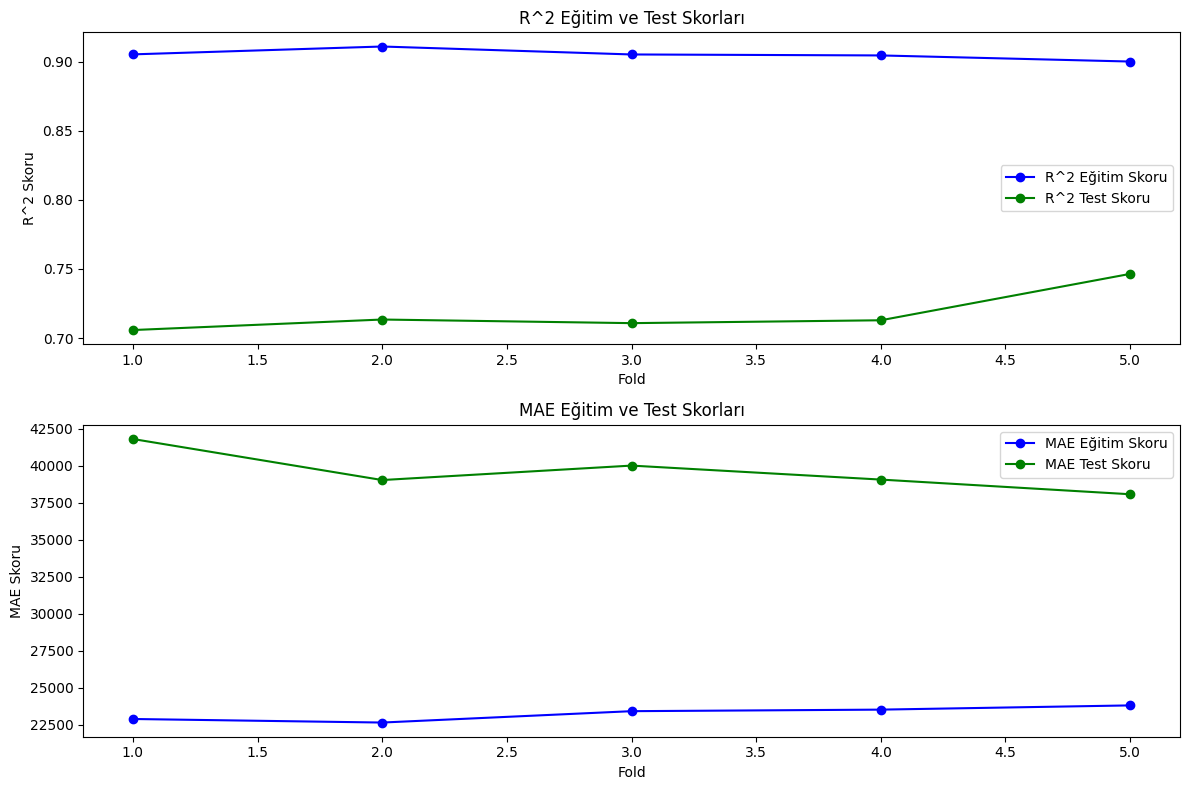

In [ ]:
plt.figure(figsize=(12, 8))

# R^2 Skorları
plt.subplot(2, 1, 1)
plt.plot(range(1, 6), train_scores, marker='o', label='R^2 Eğitim Skoru', color='blue')
plt.plot(range(1, 6), test_scores, marker='o', label='R^2 Test Skoru', color='green')
plt.title('R^2 Eğitim ve Test Skorları')
plt.xlabel('Fold')
plt.ylabel('R^2 Skoru')
plt.legend()

# MAE Skorları
plt.subplot(2, 1, 2)
plt.plot(range(1, 6), train_maes, marker='o', label='MAE Eğitim Skoru', color='blue')
plt.plot(range(1, 6), test_maes, marker='o', label='MAE Test Skoru', color='green')
plt.title('MAE Eğitim ve Test Skorları')
plt.xlabel('Fold')
plt.ylabel('MAE Skoru')
plt.legend()

plt.tight_layout()
plt.show()

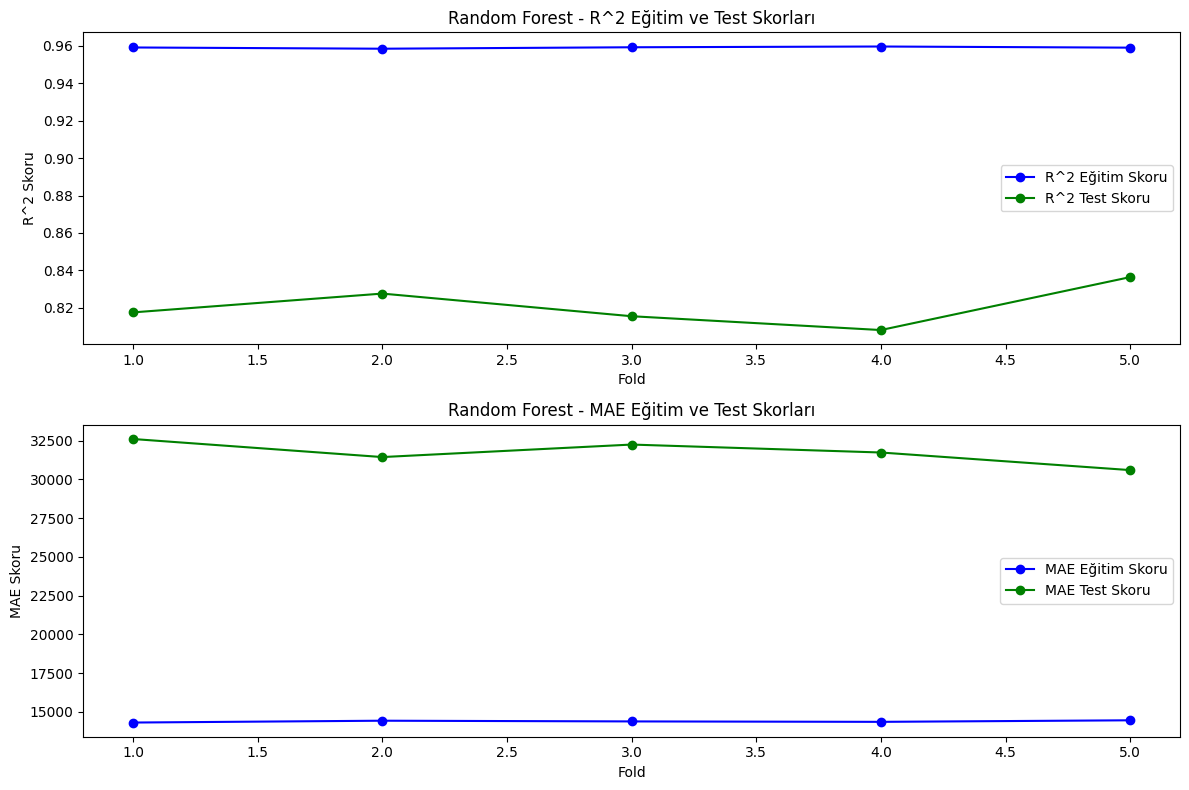

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)


rf_model = RandomForestRegressor(n_estimators=300, random_state=42,max_depth=30,min_samples_leaf=2,min_samples_split=2)

# Cross-validation skorlarını almak için bir fonksiyon
def get_cross_val_scores(model, X, y, cv):
    train_scores = []
    test_scores = []
    train_maes = []
    test_maes = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

        train_mae = mean_absolute_error(y_train, model.predict(X_train))
        test_mae = mean_absolute_error(y_test, model.predict(X_test))

        train_scores.append(train_score)
        test_scores.append(test_score)
        train_maes.append(train_mae)
        test_maes.append(test_mae)

    return train_scores, test_scores, train_maes, test_maes

# Cross-validation skorlarını al
train_scores_rf, test_scores_rf, train_maes_rf, test_maes_rf = get_cross_val_scores(rf_model, X, y, kf)

# Grafik oluşturma
plt.figure(figsize=(12, 8))

# R^2 Skorları
plt.subplot(2, 1, 1)
plt.plot(range(1, 6), train_scores_rf, marker='o', label='R^2 Eğitim Skoru', color='blue')
plt.plot(range(1, 6), test_scores_rf, marker='o', label='R^2 Test Skoru', color='green')
plt.title('Random Forest - R^2 Eğitim ve Test Skorları')
plt.xlabel('Fold')
plt.ylabel('R^2 Skoru')
plt.legend()

# MAE Skorları
plt.subplot(2, 1, 2)
plt.plot(range(1, 6), train_maes_rf, marker='o', label='MAE Eğitim Skoru', color='blue')
plt.plot(range(1, 6), test_maes_rf, marker='o', label='MAE Test Skoru', color='green')
plt.title('Random Forest - MAE Eğitim ve Test Skorları')
plt.xlabel('Fold')
plt.ylabel('MAE Skoru')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame({
    'Fold': range(1, 6),
    'Train R^2 Score': train_scores_rf,
    'Test R^2 Score': test_scores_rf,
    'Train MAE Score': train_maes_rf,
    'Test MAE Score': test_maes_rf
})

# Display the results table
print(results_df)

   Fold  Train R^2 Score  Test R^2 Score  Train MAE Score  Test MAE Score
0     1         0.959021        0.817626     14305.411509    32600.306681
1     2         0.958359        0.827661     14423.840470    31435.352996
2     3         0.959129        0.815581     14378.197790    32242.354424
3     4         0.959534        0.808203     14350.422278    31729.736553
4     5         0.958928        0.836451     14450.355171    30594.425391


In [ ]:

test_example = X_test.iloc[2:3]


prediction = rf_model.predict(test_example)


print("El ile Tahmin Edilen Değer:", prediction[0])

El ile Tahmin Edilen Değer: 199416.17116402116


In [ ]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13589,-117.30,34.12,50.0,1629.0,437.0,1581.0,394.0,2.2019,0,1,0,0,0
19849,-119.27,36.39,17.0,2076.0,350.0,998.0,340.0,4.3281,0,1,0,0,0
7868,-118.12,33.88,40.0,2344.0,571.0,1305.0,544.0,3.1923,1,0,0,0,0
13071,-121.31,38.57,9.0,2748.0,521.0,1663.0,565.0,3.5192,0,1,0,0,0
8863,-118.38,34.06,52.0,1311.0,217.0,578.0,205.0,7.6771,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,-122.01,36.91,19.0,691.0,191.0,324.0,167.0,3.1312,0,0,0,0,1
2537,-122.01,39.74,20.0,2332.0,518.0,1856.0,495.0,2.1746,0,1,0,0,0
766,-122.10,37.66,33.0,1954.0,464.0,1293.0,448.0,3.0489,0,0,0,1,0
17628,-121.92,37.26,33.0,1306.0,259.0,762.0,237.0,4.5208,1,0,0,0,0


In [ ]:
y_test

13589     63500.0
19849    145700.0
7868     191900.0
13071    113300.0
8863     500001.0
           ...   
18557    388500.0
2537      58700.0
766      152600.0
17628    230700.0
17114    341700.0
Name: median_house_value, Length: 5383, dtype: float64

In [ ]:

test_example = X_train.iloc[1:2]


prediction = rf_model.predict(test_example)

print("El ile Tahmin Edilen Değer:", prediction[0])

El ile Tahmin Edilen Değer: 322591.34


In [ ]:
y_train

4414     174300.0
7892     344700.0
16429    186900.0
3786     194100.0
539      102200.0
           ...   
12982    119800.0
13815     98500.0
6130     147200.0
950      213800.0
18211     40000.0
Name: median_house_value, Length: 12558, dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)


#rf_model = RandomForestRegressor(n_estimators=150, random_state=42)

# Cross-validation skorlarını almak için bir fonksiyon
def get_cross_val_scores(model, X, y, cv):
    train_scores = []
    test_scores = []
    train_maes = []
    test_maes = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

        train_mae = mean_absolute_error(y_train, model.predict(X_train))
        test_mae = mean_absolute_error(y_test, model.predict(X_test))

        train_scores.append(train_score)
        test_scores.append(test_score)
        train_maes.append(train_mae)
        test_maes.append(test_mae)

    return train_scores, test_scores, train_maes, test_maes
# Parametrelerin bir grid'i tanımlanır
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForestRegressor modeli oluşturulur
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV objesi oluşturulur
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)

# Grid Search uygulanır
grid_search.fit(X, y)

# En iyi parametreler
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

# En iyi model
best_rf_model = grid_search.best_estimator_

# Cross-validation skorları al
train_scores_rf, test_scores_rf, train_maes_rf, test_maes_rf = get_cross_val_scores(best_rf_model, X, y, kf)

# Grafik oluşturma
plt.figure(figsize=(12, 8))

# R^2 Skorları
plt.subplot(2, 1, 1)
plt.plot(range(1, 6), train_scores_rf, marker='o', label='R^2 Eğitim Skoru', color='blue')
plt.plot(range(1, 6), test_scores_rf, marker='o', label='R^2 Test Skoru', color='green')
plt.title('Random Forest - R^2 Eğitim ve Test Skorları')
plt.xlabel('Fold')
plt.ylabel('R^2 Skoru')
plt.legend()

# MAE Skorları
plt.subplot(2, 1, 2)
plt.plot(range(1, 6), train_maes_rf, marker='o', label='MAE Eğitim Skoru', color='blue')
plt.plot(range(1, 6), test_maes_rf, marker='o', label='MAE Test Skoru', color='green')
plt.title('Random Forest - MAE Eğitim ve Test Skorları')
plt.xlabel('Fold')
plt.ylabel('MAE Skoru')
plt.legend()

plt.tight_layout()
plt.show()


En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


NameError: name 'mean_absolute_error' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

# RandomForestRegressor modelini oluşturun
rf_model = RandomForestRegressor(random_state=42)

# Parametrelerin bir grid'i tanımlanır
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV objesi oluşturulur
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=-1)

# Grid Search uygulanır
grid_search.fit(X_train, y_train)

# En iyi parametreler
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

# En iyi model
best_rf_model = grid_search.best_estimator_

# Test setinde performansı değerlendirin
y_pred = best_rf_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("Test seti MAE:", test_mae)

En iyi parametreler: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test seti MAE: 33002.380909561085
